In [44]:
import os
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import *
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold,learning_curve
import math

## 함수 정의

In [45]:
#엑셀 저장을 위한 writer
#writer = pd.ExcelWriter('변수 중요도.xlsx', engine='xlsxwriter')

# Data Load

In [46]:
data_cycle = 'all_condition_stat_cycle_filtered.csv'

In [47]:
data = pd.read_csv("./data/"+data_cycle)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300,down
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300,down
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300,down
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300,down
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,580.818322,3.133201,2.587196,2.310177,0.213215,13.073614,1.431366,1.851970,54.386073,44.422093,...,-0.219265,-2.766058,4.170769,0.553080,0.067663,4,6.0,5000,500,up
215053,582.032368,3.721833,2.669275,3.034522,0.380387,14.117784,1.681629,3.203336,57.948220,42.156799,...,-0.161040,-2.854631,3.320326,0.233940,-0.496502,4,6.0,5000,500,up
215054,583.426041,3.511822,2.444397,2.999400,0.492054,13.476082,1.526276,2.936469,55.148492,43.277311,...,-0.034108,-2.835090,3.020172,0.207604,-0.521229,4,6.0,5000,500,up
215055,580.350537,3.449806,2.239240,3.012830,0.292238,10.928611,1.126394,1.072886,58.075829,45.329429,...,-0.153948,-3.146117,2.982659,0.284559,-0.278496,4,6.0,5000,500,up


In [48]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [49]:
groups_ae = down.groupby('Ae')
groups_ap = down.groupby('Ap')
groups_feed = down.groupby('feed')
groups_rpm = down.groupby('rpm')

# Ae

In [50]:
ae_1 = groups_ae.get_group(1)
ae_1 = ae_1.reset_index(drop=True)
ae_1 = ae_1.drop(['Milling_Type'], axis=1)

ae_2 = groups_ae.get_group(2)
ae_2 = ae_2.reset_index(drop=True)
ae_2 = ae_2.drop(['Milling_Type'], axis=1)

ae_3 = groups_ae.get_group(3)
ae_3 = ae_3.reset_index(drop=True)
ae_3 = ae_3.drop(['Milling_Type'], axis=1)

ae_4 = groups_ae.get_group(4)
ae_4 = ae_4.reset_index(drop=True)
ae_4 = ae_4.drop(['Milling_Type'], axis=1)

In [51]:
count = pd.DataFrame({'feature':ae_1.columns,'counts':[0]*54})
mean = pd.DataFrame({'feature':ae_1.columns,'mean':[0]*54})

## Ae 1

In [52]:
train = pd.concat([ae_2, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [53]:
X_test = ae_1.iloc[: , 1:]
y_test = ae_1['RMS_CF_max']

In [54]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [56]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ae1') # 엑셀에 저장

In [57]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

In [58]:
# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]

## Ae 2

In [59]:
train = pd.concat([ae_1, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [60]:
X_test = ae_2.iloc[: , 1:]
y_test = ae_2['RMS_CF_max']

In [61]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [63]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ae2') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.8454
35    RMS_Z_CURRENT_mean      0.0453
50                    Ap      0.0298
14    RMS_SPINDLE_C_mean      0.0254
29     RMS_Y_CURRENT_std      0.0248
52                  feed      0.0092
7     RMS_SPINDLE_V_mean      0.0057
4            RMS_ACC_max      0.0053
49                    Ae      0.0040
16  RMS_SPINDLE_C_median      0.0026
36     RMS_Z_CURRENT_std      0.0017
37  RMS_Z_CURRENT_median      0.0004
2         RMS_ACC_median      0.0003
39     RMS_Z_CURRENT_max      0.0000
31     RMS_Y_CURRENT_min      0.0000
32     RMS_Y_CURRENT_max      0.0000
33    RMS_Y_CURRENT_skew      0.0000
34    RMS_Y_CURRENT_kurt      0.0000
38     RMS_Z_CURRENT_min      0.0000
41    RMS_Z_CURRENT_kurt      0.0000
40    RMS_Z_CURRENT_skew      0.0000
42            SOUND_mean      0.0000
51                   rpm      0.0000
44          SOUND_median      0.0000
45             SOUND_min      0.0000
46             SOUND_max      0.0000
4

In [64]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

In [65]:
# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]

## Ae3

In [66]:
train = pd.concat([ae_1, ae_2, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [67]:
X_test = ae_3.iloc[: , 1:]
y_test = ae_3['RMS_CF_max']

In [68]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [69]:
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [70]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ae3') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7209
50                    Ap      0.1219
14    RMS_SPINDLE_C_mean      0.0408
29     RMS_Y_CURRENT_std      0.0385
38     RMS_Z_CURRENT_min      0.0259
24     RMS_X_CURRENT_min      0.0155
49                    Ae      0.0076
35    RMS_Z_CURRENT_mean      0.0070
52                  feed      0.0051
7     RMS_SPINDLE_V_mean      0.0049
2         RMS_ACC_median      0.0030
46             SOUND_max      0.0024
36     RMS_Z_CURRENT_std      0.0014
23  RMS_X_CURRENT_median      0.0012
16  RMS_SPINDLE_C_median      0.0010
21    RMS_X_CURRENT_mean      0.0010
39     RMS_Z_CURRENT_max      0.0005
0           RMS_ACC_mean      0.0005
37  RMS_Z_CURRENT_median      0.0003
26    RMS_X_CURRENT_skew      0.0001
51                   rpm      0.0001
22     RMS_X_CURRENT_std      0.0001
25     RMS_X_CURRENT_max      0.0001
44          SOUND_median      0.0000
8      RMS_SPINDLE_V_std      0.0000
40    RMS_Z_CURRENT_skew      0.0000
4

In [71]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

In [72]:
# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]

## Ae4

In [73]:
train = pd.concat([ae_1, ae_2, ae_3], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [74]:
X_test = ae_4.iloc[: , 1:]
y_test = ae_4['RMS_CF_max']

In [75]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [76]:
dt = DecisionTreeRegressor(max_depth=40,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=40, random_state=42)

In [77]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ae4') # 엑셀에 저장
print(importance)

            feature name  importance
50                    Ap      0.6824
43             SOUND_std      0.1623
49                    Ae      0.0924
52                  feed      0.0258
29     RMS_Y_CURRENT_std      0.0130
36     RMS_Z_CURRENT_std      0.0056
14    RMS_SPINDLE_C_mean      0.0041
47            SOUND_skew      0.0035
38     RMS_Z_CURRENT_min      0.0020
35    RMS_Z_CURRENT_mean      0.0017
22     RMS_X_CURRENT_std      0.0013
51                   rpm      0.0012
16  RMS_SPINDLE_C_median      0.0009
48            SOUND_kurt      0.0006
24     RMS_X_CURRENT_min      0.0006
21    RMS_X_CURRENT_mean      0.0005
40    RMS_Z_CURRENT_skew      0.0004
2         RMS_ACC_median      0.0003
23  RMS_X_CURRENT_median      0.0003
37  RMS_Z_CURRENT_median      0.0002
0           RMS_ACC_mean      0.0002
7     RMS_SPINDLE_V_mean      0.0002
4            RMS_ACC_max      0.0002
44          SOUND_median      0.0001
9   RMS_SPINDLE_V_median      0.0001
25     RMS_X_CURRENT_max      0.0001
1

In [78]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

In [79]:
# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]

In [80]:
# 평균 구하기
index = mean[mean['mean']==0].index
mean=mean.drop(index)
mean['mean'] = mean['mean']/4
mean = mean.sort_values('mean',ascending=False)

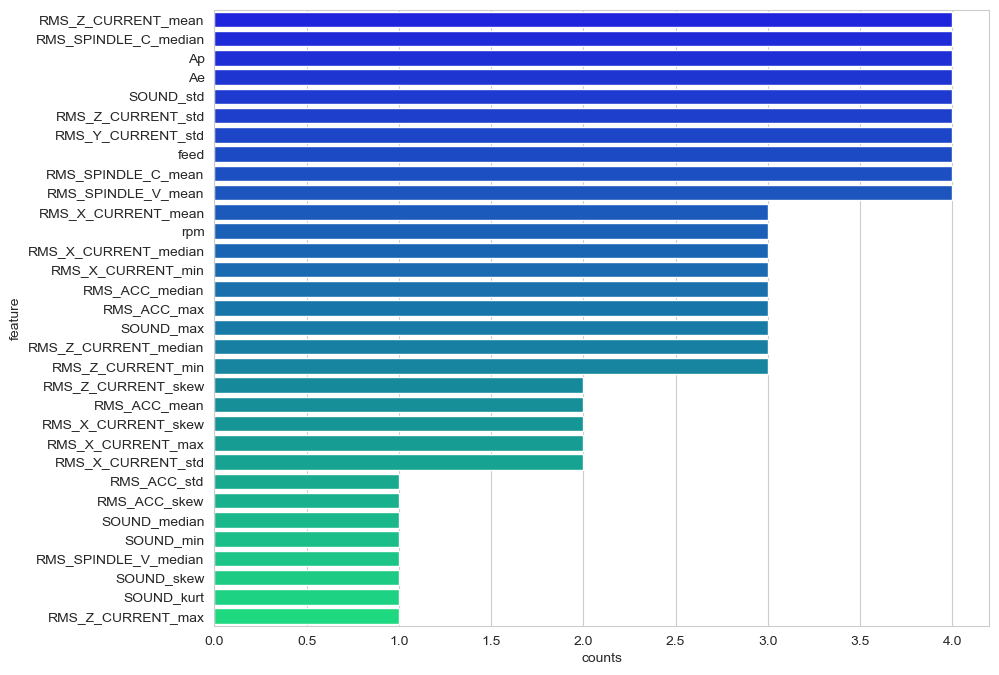

In [81]:
# 중요도 횟수 그래프
idx = count[count['counts'] == 0].index
count=count.drop(idx)
count = count.sort_values('counts',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax1=sns.barplot(x='counts',y='feature',data=count,orient='h',palette='winter')
#ax1.bar_label(ax1.containers[0])
plt.show()

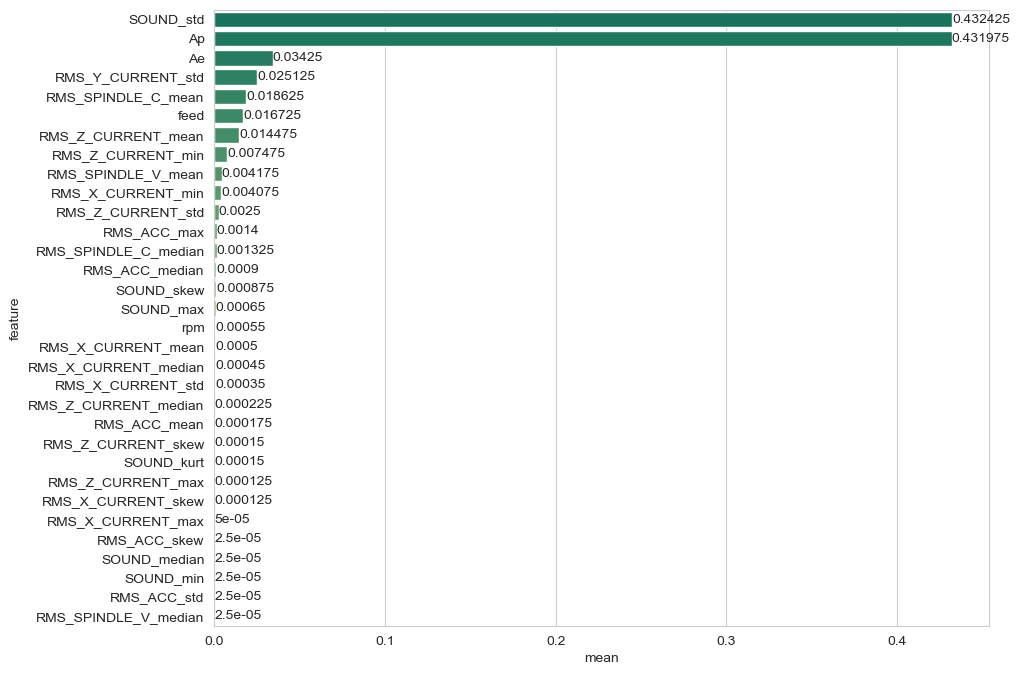

In [82]:
# 중요도 평균 그래프
idx = mean[mean['mean'] == 0].index
mean=mean.drop(idx)
mean = mean.sort_values('mean',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax2=sns.barplot(x='mean',y='feature',data=mean,orient='h',palette='summer')
ax2.bar_label(ax2.containers[0])
plt.show()

# Ap

In [83]:
ap_100 = groups_ap.get_group(1)
ap_100 = ap_100.reset_index(drop=True)
ap_100 = ap_100.drop(['Milling_Type'], axis=1)

ap_225 = groups_ap.get_group(2.25)
ap_225 = ap_225.reset_index(drop=True)
ap_225 = ap_225.drop(['Milling_Type'], axis=1)

ap_350 = groups_ap.get_group(3.5)
ap_350 = ap_350.reset_index(drop=True)
ap_350 = ap_350.drop(['Milling_Type'], axis=1)

ap_475 = groups_ap.get_group(4.75)
ap_475 = ap_475.reset_index(drop=True)
ap_475 = ap_475.drop(['Milling_Type'], axis=1)

ap_600 = groups_ap.get_group(6)
ap_600 = ap_600.reset_index(drop=True)
ap_600 = ap_600.drop(['Milling_Type'], axis=1)

In [84]:
count = pd.DataFrame({'feature':ae_1.columns,'counts':[0]*54})
mean = pd.DataFrame({'feature':ae_1.columns,'mean':[0]*54})

## Ap 100

In [85]:
train = pd.concat([ap_225, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [86]:
X_test = ap_100.iloc[: , 1:]
y_test = ap_100['RMS_CF_max']

In [87]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [88]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [89]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ap100') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.6863
50                    Ap      0.0752
49                    Ae      0.0579
35    RMS_Z_CURRENT_mean      0.0562
29     RMS_Y_CURRENT_std      0.0506
14    RMS_SPINDLE_C_mean      0.0323
52                  feed      0.0199
7     RMS_SPINDLE_V_mean      0.0087
16  RMS_SPINDLE_C_median      0.0043
38     RMS_Z_CURRENT_min      0.0032
36     RMS_Z_CURRENT_std      0.0030
0           RMS_ACC_mean      0.0014
23  RMS_X_CURRENT_median      0.0009
12    RMS_SPINDLE_V_skew      0.0000
8      RMS_SPINDLE_V_std      0.0000
6           RMS_ACC_kurt      0.0000
37  RMS_Z_CURRENT_median      0.0000
5           RMS_ACC_skew      0.0000
39     RMS_Z_CURRENT_max      0.0000
40    RMS_Z_CURRENT_skew      0.0000
41    RMS_Z_CURRENT_kurt      0.0000
42            SOUND_mean      0.0000
4            RMS_ACC_max      0.0000
33    RMS_Y_CURRENT_skew      0.0000
44          SOUND_median      0.0000
45             SOUND_min      0.0000
4

In [90]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## Ap 225

In [91]:
train = pd.concat([ap_100, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [92]:
X_test = ap_225.iloc[: , 1:]
y_test = ap_225['RMS_CF_max']

In [93]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [94]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [95]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ap225') # 엑셀에 저장
print(importance)

            feature name  importance
46             SOUND_max      0.6356
43             SOUND_std      0.1566
50                    Ap      0.0777
49                    Ae      0.0670
52                  feed      0.0218
29     RMS_Y_CURRENT_std      0.0189
7     RMS_SPINDLE_V_mean      0.0049
14    RMS_SPINDLE_C_mean      0.0037
47            SOUND_skew      0.0028
35    RMS_Z_CURRENT_mean      0.0027
36     RMS_Z_CURRENT_std      0.0024
38     RMS_Z_CURRENT_min      0.0010
37  RMS_Z_CURRENT_median      0.0010
16  RMS_SPINDLE_C_median      0.0005
22     RMS_X_CURRENT_std      0.0005
24     RMS_X_CURRENT_min      0.0004
23  RMS_X_CURRENT_median      0.0004
4            RMS_ACC_max      0.0004
40    RMS_Z_CURRENT_skew      0.0002
48            SOUND_kurt      0.0002
51                   rpm      0.0002
41    RMS_Z_CURRENT_kurt      0.0002
0           RMS_ACC_mean      0.0002
21    RMS_X_CURRENT_mean      0.0002
45             SOUND_min      0.0001
2         RMS_ACC_median      0.0001
2

In [96]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## Ap 350

In [97]:
train = pd.concat([ap_100, ap_225, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [98]:
X_test = ap_350.iloc[: , 1:]
y_test = ap_350['RMS_CF_max']

In [99]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [100]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [101]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ap350') # 엑셀에 저장
print(importance)

            feature name  importance
50                    Ap      0.7600
43             SOUND_std      0.1156
49                    Ae      0.0746
52                  feed      0.0221
29     RMS_Y_CURRENT_std      0.0077
7     RMS_SPINDLE_V_mean      0.0045
47            SOUND_skew      0.0026
36     RMS_Z_CURRENT_std      0.0024
35    RMS_Z_CURRENT_mean      0.0020
26    RMS_X_CURRENT_skew      0.0019
51                   rpm      0.0010
37  RMS_Z_CURRENT_median      0.0010
14    RMS_SPINDLE_C_mean      0.0009
21    RMS_X_CURRENT_mean      0.0008
38     RMS_Z_CURRENT_min      0.0006
0           RMS_ACC_mean      0.0003
16  RMS_SPINDLE_C_median      0.0003
40    RMS_Z_CURRENT_skew      0.0003
25     RMS_X_CURRENT_max      0.0003
23  RMS_X_CURRENT_median      0.0002
2         RMS_ACC_median      0.0002
24     RMS_X_CURRENT_min      0.0001
22     RMS_X_CURRENT_std      0.0001
45             SOUND_min      0.0001
46             SOUND_max      0.0001
48            SOUND_kurt      0.0001
8

In [102]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## Ap 475

In [103]:
train = pd.concat([ap_100, ap_225, ap_350, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [104]:
X_test = ap_475.iloc[: , 1:]
y_test = ap_475['RMS_CF_max']

In [105]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [106]:
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [107]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ap475') # 엑셀에 저장
print(importance)

            feature name  importance
45             SOUND_min      0.6200
43             SOUND_std      0.1439
50                    Ap      0.1377
29     RMS_Y_CURRENT_std      0.0470
49                    Ae      0.0287
52                  feed      0.0105
14    RMS_SPINDLE_C_mean      0.0038
7     RMS_SPINDLE_V_mean      0.0026
47            SOUND_skew      0.0021
35    RMS_Z_CURRENT_mean      0.0007
51                   rpm      0.0006
36     RMS_Z_CURRENT_std      0.0004
38     RMS_Z_CURRENT_min      0.0004
21    RMS_X_CURRENT_mean      0.0004
39     RMS_Z_CURRENT_max      0.0002
16  RMS_SPINDLE_C_median      0.0002
24     RMS_X_CURRENT_min      0.0002
23  RMS_X_CURRENT_median      0.0002
22     RMS_X_CURRENT_std      0.0002
37  RMS_Z_CURRENT_median      0.0001
0           RMS_ACC_mean      0.0001
20    RMS_SPINDLE_C_kurt      0.0000
19    RMS_SPINDLE_C_skew      0.0000
2         RMS_ACC_median      0.0000
3            RMS_ACC_min      0.0000
4            RMS_ACC_max      0.0000
4

In [108]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## Ap 600

In [109]:
train = pd.concat([ap_100, ap_225, ap_350, ap_475], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [110]:
X_test = ap_600.iloc[: , 1:]
y_test = ap_600['RMS_CF_max']

In [111]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [112]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [113]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'Ap600') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.6739
29     RMS_Y_CURRENT_std      0.1320
50                    Ap      0.0681
49                    Ae      0.0406
35    RMS_Z_CURRENT_mean      0.0203
14    RMS_SPINDLE_C_mean      0.0183
2         RMS_ACC_median      0.0148
36     RMS_Z_CURRENT_std      0.0106
52                  feed      0.0068
51                   rpm      0.0045
0           RMS_ACC_mean      0.0023
23  RMS_X_CURRENT_median      0.0022
21    RMS_X_CURRENT_mean      0.0020
4            RMS_ACC_max      0.0008
26    RMS_X_CURRENT_skew      0.0007
31     RMS_Y_CURRENT_min      0.0003
37  RMS_Z_CURRENT_median      0.0003
24     RMS_X_CURRENT_min      0.0003
38     RMS_Z_CURRENT_min      0.0002
16  RMS_SPINDLE_C_median      0.0002
5           RMS_ACC_skew      0.0002
47            SOUND_skew      0.0001
1            RMS_ACC_std      0.0001
28    RMS_Y_CURRENT_mean      0.0001
46             SOUND_max      0.0001
7     RMS_SPINDLE_V_mean      0.0001
2

In [114]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


In [115]:
# 평균 구하기
index = mean[mean['mean']==0].index
mean=mean.drop(index)
mean['mean'] = mean['mean']/4
mean = mean.sort_values('mean',ascending=False)


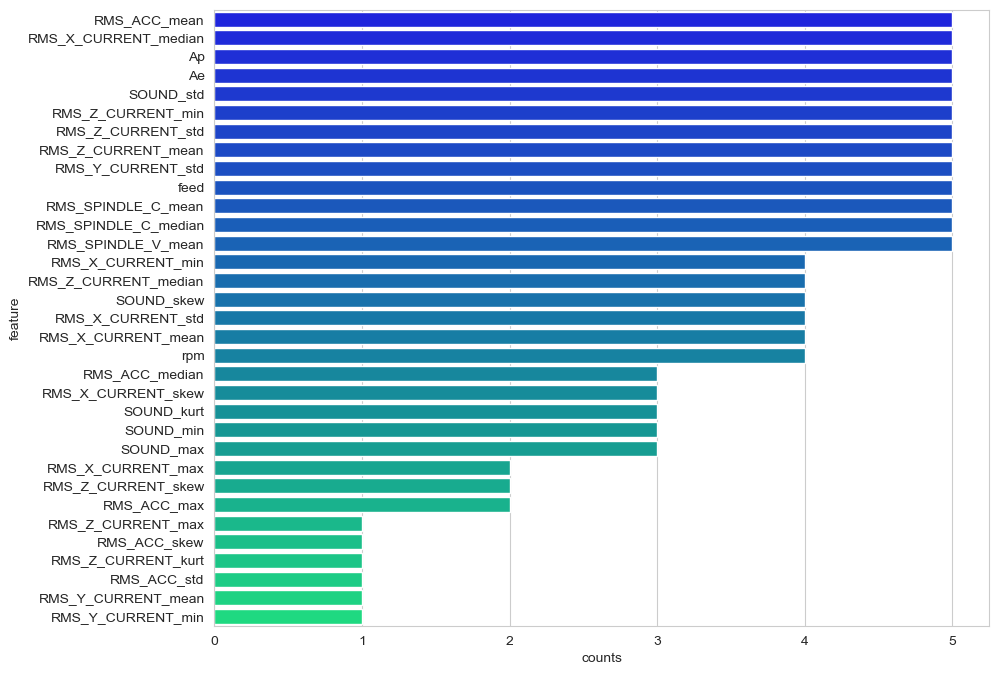

In [116]:
# 중요도 횟수 그래프
idx = count[count['counts'] == 0].index
count=count.drop(idx)
count = count.sort_values('counts',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax1=sns.barplot(x='counts',y='feature',data=count,orient='h',palette='winter')
#ax1.bar_label(ax1.containers[0])
plt.show()


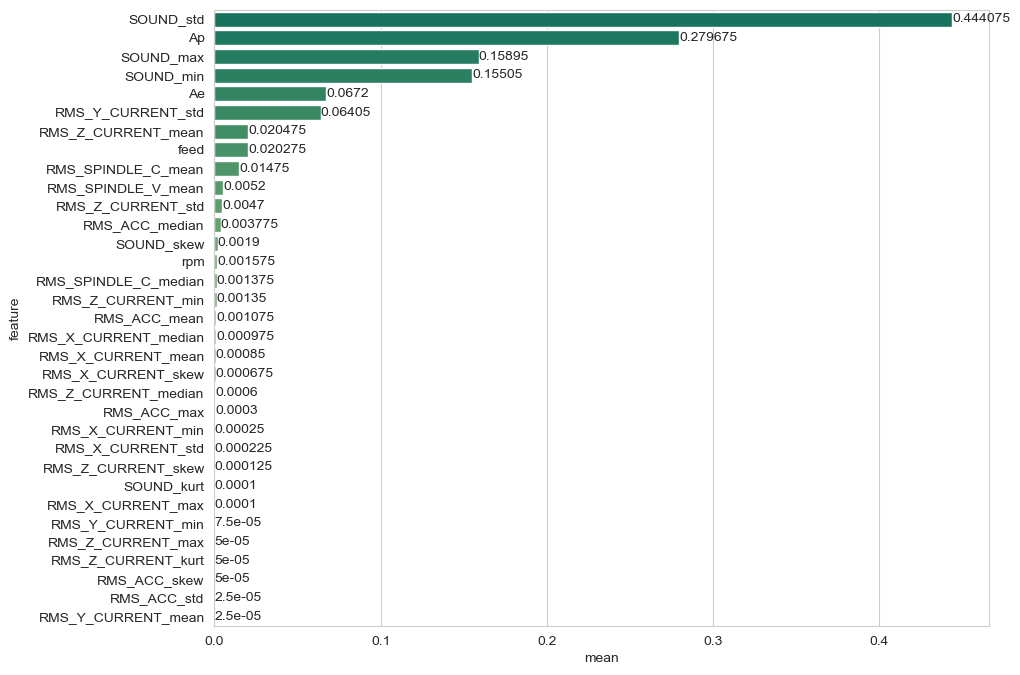

In [117]:
# 중요도 평균 그래프
idx = mean[mean['mean'] == 0].index
mean=mean.drop(idx)
mean = mean.sort_values('mean',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax2=sns.barplot(x='mean',y='feature',data=mean,orient='h',palette='summer')
ax2.bar_label(ax2.containers[0])
plt.show()

# Feed

In [118]:
feed_300 = groups_feed.get_group(300)
feed_300 = feed_300.reset_index(drop=True)
feed_300 = feed_300.drop(['Milling_Type'], axis=1)

feed_350 = groups_feed.get_group(350)
feed_350 = feed_350.reset_index(drop=True)
feed_350 = feed_350.drop(['Milling_Type'], axis=1)

feed_400 = groups_feed.get_group(400)
feed_400 = feed_400.reset_index(drop=True)
feed_400 = feed_400.drop(['Milling_Type'], axis=1)

feed_450 = groups_feed.get_group(450)
feed_450 = feed_450.reset_index(drop=True)
feed_450 = feed_450.drop(['Milling_Type'], axis=1)

feed_500 = groups_feed.get_group(500)
feed_500 = feed_500.reset_index(drop=True)
feed_500 = feed_500.drop(['Milling_Type'], axis=1)

In [119]:
count = pd.DataFrame({'feature':ae_1.columns,'counts':[0]*54})
mean = pd.DataFrame({'feature':ae_1.columns,'mean':[0]*54})

## feed 300

In [120]:
train = pd.concat([feed_350, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [121]:
X_test = feed_300.iloc[: , 1:]
y_test = feed_300['RMS_CF_max']

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [123]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [124]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'feed300') # 엑셀에 저장
print(importance)

            feature name  importance
50                    Ap      0.6950
43             SOUND_std      0.1626
49                    Ae      0.0938
29     RMS_Y_CURRENT_std      0.0151
52                  feed      0.0106
7     RMS_SPINDLE_V_mean      0.0053
14    RMS_SPINDLE_C_mean      0.0046
35    RMS_Z_CURRENT_mean      0.0034
36     RMS_Z_CURRENT_std      0.0016
1            RMS_ACC_std      0.0013
38     RMS_Z_CURRENT_min      0.0011
51                   rpm      0.0011
23  RMS_X_CURRENT_median      0.0007
16  RMS_SPINDLE_C_median      0.0007
47            SOUND_skew      0.0006
21    RMS_X_CURRENT_mean      0.0006
37  RMS_Z_CURRENT_median      0.0004
40    RMS_Z_CURRENT_skew      0.0004
48            SOUND_kurt      0.0004
25     RMS_X_CURRENT_max      0.0002
41    RMS_Z_CURRENT_kurt      0.0001
24     RMS_X_CURRENT_min      0.0001
0           RMS_ACC_mean      0.0001
22     RMS_X_CURRENT_std      0.0001
2         RMS_ACC_median      0.0001
26    RMS_X_CURRENT_skew      0.0001
1

In [125]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## feed 350

In [126]:
train = pd.concat([feed_300, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [127]:
X_test = feed_350.iloc[: , 1:]
y_test = feed_350['RMS_CF_max']

In [128]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [129]:
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [130]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'feed350') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7038
50                    Ap      0.1489
29     RMS_Y_CURRENT_std      0.0574
49                    Ae      0.0292
14    RMS_SPINDLE_C_mean      0.0261
52                  feed      0.0144
38     RMS_Z_CURRENT_min      0.0075
7     RMS_SPINDLE_V_mean      0.0043
35    RMS_Z_CURRENT_mean      0.0017
16  RMS_SPINDLE_C_median      0.0014
46             SOUND_max      0.0011
36     RMS_Z_CURRENT_std      0.0010
1            RMS_ACC_std      0.0006
51                   rpm      0.0004
26    RMS_X_CURRENT_skew      0.0004
37  RMS_Z_CURRENT_median      0.0003
21    RMS_X_CURRENT_mean      0.0003
40    RMS_Z_CURRENT_skew      0.0002
23  RMS_X_CURRENT_median      0.0002
0           RMS_ACC_mean      0.0002
4            RMS_ACC_max      0.0002
2         RMS_ACC_median      0.0002
45             SOUND_min      0.0002
31     RMS_Y_CURRENT_min      0.0001
48            SOUND_kurt      0.0000
47            SOUND_skew      0.0000
3

In [131]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## feed 400

In [132]:
train = pd.concat([feed_300, feed_350, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [133]:
X_test = feed_400.iloc[: , 1:]
y_test = feed_400['RMS_CF_max']

In [134]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [135]:
dt = DecisionTreeRegressor(max_depth=40,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=40, random_state=42)

In [136]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'feed400') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7250
50                    Ap      0.1171
35    RMS_Z_CURRENT_mean      0.0313
29     RMS_Y_CURRENT_std      0.0296
49                    Ae      0.0276
14    RMS_SPINDLE_C_mean      0.0240
52                  feed      0.0183
36     RMS_Z_CURRENT_std      0.0047
7     RMS_SPINDLE_V_mean      0.0044
21    RMS_X_CURRENT_mean      0.0038
2         RMS_ACC_median      0.0032
16  RMS_SPINDLE_C_median      0.0029
23  RMS_X_CURRENT_median      0.0022
47            SOUND_skew      0.0013
51                   rpm      0.0007
24     RMS_X_CURRENT_min      0.0006
37  RMS_Z_CURRENT_median      0.0005
1            RMS_ACC_std      0.0003
48            SOUND_kurt      0.0003
22     RMS_X_CURRENT_std      0.0003
0           RMS_ACC_mean      0.0003
26    RMS_X_CURRENT_skew      0.0002
6           RMS_ACC_kurt      0.0002
45             SOUND_min      0.0002
46             SOUND_max      0.0002
4            RMS_ACC_max      0.0002
2

In [137]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## feed 450

In [138]:
train = pd.concat([feed_300, feed_350, feed_400, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [139]:
X_test = feed_450.iloc[: , 1:]
y_test = feed_450['RMS_CF_max']

In [140]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [141]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [142]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'feed450') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7292
50                    Ap      0.1183
35    RMS_Z_CURRENT_mean      0.0320
49                    Ae      0.0317
29     RMS_Y_CURRENT_std      0.0289
14    RMS_SPINDLE_C_mean      0.0186
52                  feed      0.0158
7     RMS_SPINDLE_V_mean      0.0048
51                   rpm      0.0040
36     RMS_Z_CURRENT_std      0.0037
16  RMS_SPINDLE_C_median      0.0024
38     RMS_Z_CURRENT_min      0.0018
23  RMS_X_CURRENT_median      0.0014
0           RMS_ACC_mean      0.0014
22     RMS_X_CURRENT_std      0.0013
37  RMS_Z_CURRENT_median      0.0009
21    RMS_X_CURRENT_mean      0.0008
2         RMS_ACC_median      0.0006
1            RMS_ACC_std      0.0005
48            SOUND_kurt      0.0004
47            SOUND_skew      0.0004
24     RMS_X_CURRENT_min      0.0003
26    RMS_X_CURRENT_skew      0.0002
46             SOUND_max      0.0001
4            RMS_ACC_max      0.0001
28    RMS_Y_CURRENT_mean      0.0001
4

In [143]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## feed 500

In [144]:
train = pd.concat([feed_300, feed_350, feed_400, feed_450], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [145]:
X_test = feed_500.iloc[: , 1:]
y_test = feed_500['RMS_CF_max']

In [146]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [147]:
dt = DecisionTreeRegressor(max_depth=50,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=50, random_state=42)

In [148]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'feed500') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7141
50                    Ap      0.1407
49                    Ae      0.0338
35    RMS_Z_CURRENT_mean      0.0317
29     RMS_Y_CURRENT_std      0.0268
14    RMS_SPINDLE_C_mean      0.0176
52                  feed      0.0137
7     RMS_SPINDLE_V_mean      0.0059
36     RMS_Z_CURRENT_std      0.0044
16  RMS_SPINDLE_C_median      0.0022
47            SOUND_skew      0.0018
23  RMS_X_CURRENT_median      0.0017
51                   rpm      0.0013
0           RMS_ACC_mean      0.0009
21    RMS_X_CURRENT_mean      0.0007
38     RMS_Z_CURRENT_min      0.0005
48            SOUND_kurt      0.0004
25     RMS_X_CURRENT_max      0.0003
37  RMS_Z_CURRENT_median      0.0003
2         RMS_ACC_median      0.0003
45             SOUND_min      0.0002
22     RMS_X_CURRENT_std      0.0002
1            RMS_ACC_std      0.0002
46             SOUND_max      0.0001
24     RMS_X_CURRENT_min      0.0001
5           RMS_ACC_skew      0.0001
4

In [149]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


In [150]:
# 평균 구하기
index = mean[mean['mean']==0].index
mean=mean.drop(index)
mean['mean'] = mean['mean']/4
mean = mean.sort_values('mean',ascending=False)


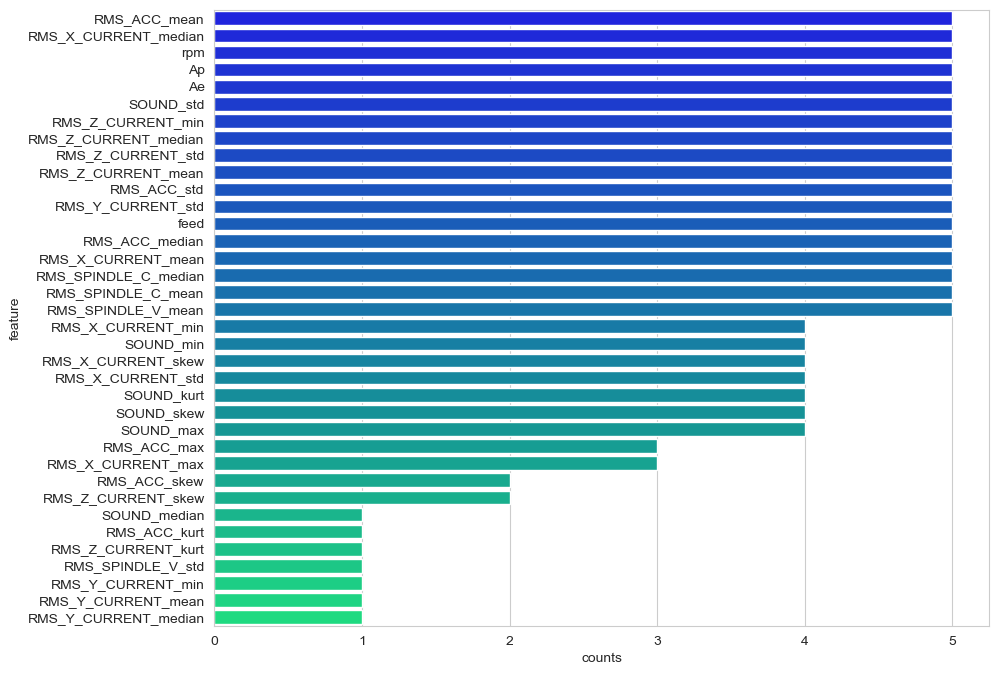

In [151]:
# 중요도 횟수 그래프
idx = count[count['counts'] == 0].index
count=count.drop(idx)
count = count.sort_values('counts',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax1=sns.barplot(x='counts',y='feature',data=count,orient='h',palette='winter')
#ax1.bar_label(ax1.containers[0])
plt.show()


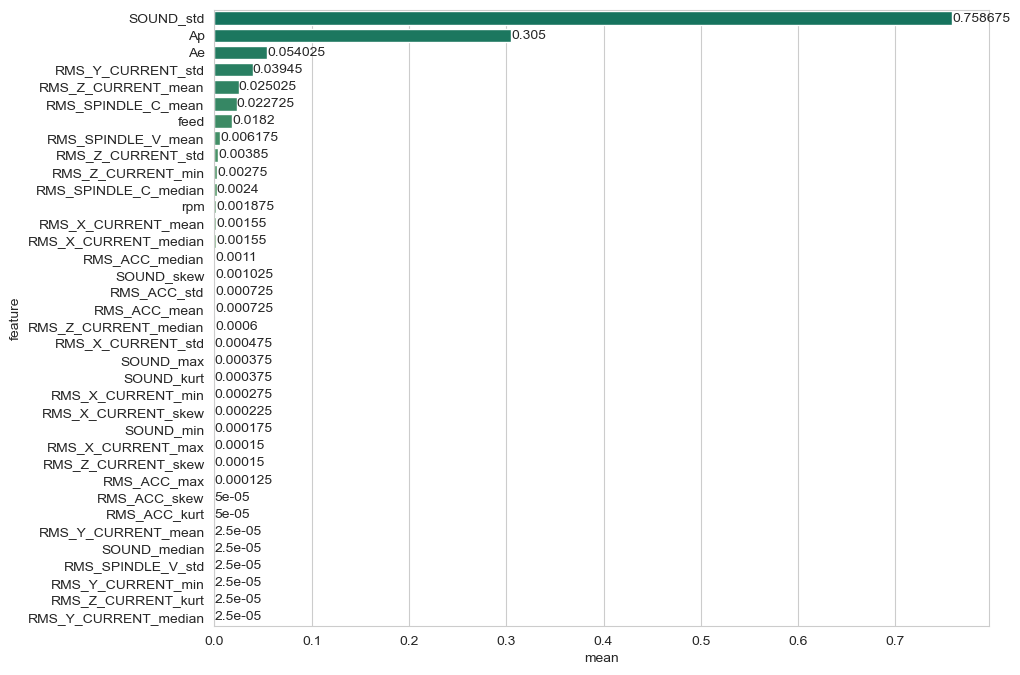

In [152]:
# 중요도 평균 그래프
idx = mean[mean['mean'] == 0].index
mean=mean.drop(idx)
mean = mean.sort_values('mean',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax2=sns.barplot(x='mean',y='feature',data=mean,orient='h',palette='summer')
ax2.bar_label(ax2.containers[0])
plt.show()

# RPM

In [153]:
rpm_3000 = groups_rpm.get_group(3000)
rpm_3000 = rpm_3000.reset_index(drop=True)
rpm_3000 = rpm_3000.drop(['Milling_Type'], axis=1)

rpm_3500 = groups_rpm.get_group(3500)
rpm_3500 = rpm_3500.reset_index(drop=True)
rpm_3500 = rpm_3500.drop(['Milling_Type'], axis=1)

rpm_4000 = groups_rpm.get_group(4000)
rpm_4000 = rpm_4000.reset_index(drop=True)
rpm_4000 = rpm_4000.drop(['Milling_Type'], axis=1)

rpm_4500 = groups_rpm.get_group(4500)
rpm_4500 = rpm_4500.reset_index(drop=True)
rpm_4500 = rpm_4500.drop(['Milling_Type'], axis=1)

rpm_5000 = groups_rpm.get_group(5000)
rpm_5000 = rpm_5000.reset_index(drop=True)
rpm_5000 = rpm_5000.drop(['Milling_Type'], axis=1)

In [154]:
count = pd.DataFrame({'feature':ae_1.columns,'counts':[0]*54})
mean = pd.DataFrame({'feature':ae_1.columns,'mean':[0]*54})

## rpm 3000

In [155]:
train = pd.concat([rpm_3500, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [156]:
X_test = rpm_3000.iloc[: , 1:]
y_test = rpm_3000['RMS_CF_max']

In [157]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
dt = DecisionTreeRegressor(max_depth=10,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [159]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'rpm3000') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7695
0           RMS_ACC_mean      0.1085
50                    Ap      0.0337
49                    Ae      0.0275
52                  feed      0.0197
35    RMS_Z_CURRENT_mean      0.0167
14    RMS_SPINDLE_C_mean      0.0081
36     RMS_Z_CURRENT_std      0.0079
2         RMS_ACC_median      0.0039
23  RMS_X_CURRENT_median      0.0006
38     RMS_Z_CURRENT_min      0.0005
46             SOUND_max      0.0005
39     RMS_Z_CURRENT_max      0.0004
37  RMS_Z_CURRENT_median      0.0003
16  RMS_SPINDLE_C_median      0.0003
29     RMS_Y_CURRENT_std      0.0002
22     RMS_X_CURRENT_std      0.0002
21    RMS_X_CURRENT_mean      0.0002
6           RMS_ACC_kurt      0.0002
47            SOUND_skew      0.0002
48            SOUND_kurt      0.0002
1            RMS_ACC_std      0.0001
4            RMS_ACC_max      0.0001
44          SOUND_median      0.0001
51                   rpm      0.0001
41    RMS_Z_CURRENT_kurt      0.0001
5

In [160]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## rpm 3500

In [161]:
train = pd.concat([rpm_3000, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [162]:
X_test = rpm_3500.iloc[: , 1:]
y_test = rpm_3500['RMS_CF_max']

In [163]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [164]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [165]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'rpm3500') # 엑셀에 저장
print(importance)

            feature name  importance
45             SOUND_min      0.5977
43             SOUND_std      0.1752
50                    Ap      0.1123
35    RMS_Z_CURRENT_mean      0.0376
29     RMS_Y_CURRENT_std      0.0258
14    RMS_SPINDLE_C_mean      0.0192
36     RMS_Z_CURRENT_std      0.0146
49                    Ae      0.0085
23  RMS_X_CURRENT_median      0.0056
52                  feed      0.0024
21    RMS_X_CURRENT_mean      0.0007
22     RMS_X_CURRENT_std      0.0003
51                   rpm      0.0002
16  RMS_SPINDLE_C_median      0.0001
44          SOUND_median      0.0000
48            SOUND_kurt      0.0000
31     RMS_Y_CURRENT_min      0.0000
32     RMS_Y_CURRENT_max      0.0000
33    RMS_Y_CURRENT_skew      0.0000
34    RMS_Y_CURRENT_kurt      0.0000
47            SOUND_skew      0.0000
42            SOUND_mean      0.0000
37  RMS_Z_CURRENT_median      0.0000
38     RMS_Z_CURRENT_min      0.0000
39     RMS_Z_CURRENT_max      0.0000
46             SOUND_max      0.0000
4

In [166]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## rpm 4000

In [167]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [168]:
X_test = rpm_4000.iloc[: , 1:]
y_test = rpm_4000['RMS_CF_max']

In [169]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [170]:
dt = DecisionTreeRegressor(max_depth=29,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=29, random_state=42)

In [171]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'rpm4000') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7080
50                    Ap      0.1284
29     RMS_Y_CURRENT_std      0.0397
35    RMS_Z_CURRENT_mean      0.0358
14    RMS_SPINDLE_C_mean      0.0316
49                    Ae      0.0210
52                  feed      0.0111
7     RMS_SPINDLE_V_mean      0.0031
36     RMS_Z_CURRENT_std      0.0028
47            SOUND_skew      0.0027
37  RMS_Z_CURRENT_median      0.0025
46             SOUND_max      0.0022
23  RMS_X_CURRENT_median      0.0022
21    RMS_X_CURRENT_mean      0.0019
16  RMS_SPINDLE_C_median      0.0015
38     RMS_Z_CURRENT_min      0.0012
0           RMS_ACC_mean      0.0006
2         RMS_ACC_median      0.0006
39     RMS_Z_CURRENT_max      0.0005
24     RMS_X_CURRENT_min      0.0004
4            RMS_ACC_max      0.0004
48            SOUND_kurt      0.0003
1            RMS_ACC_std      0.0003
22     RMS_X_CURRENT_std      0.0002
51                   rpm      0.0002
45             SOUND_min      0.0002
2

In [172]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## rpm 4500

In [173]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [174]:
X_test = rpm_4500.iloc[: , 1:]
y_test = rpm_4500['RMS_CF_max']

In [175]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [176]:
dt = DecisionTreeRegressor(max_depth=15,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [177]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'rpm4500') # 엑셀에 저장
print(importance)

            feature name  importance
43             SOUND_std      0.7432
50                    Ap      0.1102
29     RMS_Y_CURRENT_std      0.0540
14    RMS_SPINDLE_C_mean      0.0299
7     RMS_SPINDLE_V_mean      0.0220
49                    Ae      0.0119
52                  feed      0.0084
2         RMS_ACC_median      0.0034
16  RMS_SPINDLE_C_median      0.0031
36     RMS_Z_CURRENT_std      0.0026
23  RMS_X_CURRENT_median      0.0025
35    RMS_Z_CURRENT_mean      0.0016
21    RMS_X_CURRENT_mean      0.0013
22     RMS_X_CURRENT_std      0.0013
37  RMS_Z_CURRENT_median      0.0006
48            SOUND_kurt      0.0005
51                   rpm      0.0005
0           RMS_ACC_mean      0.0004
47            SOUND_skew      0.0003
39     RMS_Z_CURRENT_max      0.0003
4            RMS_ACC_max      0.0003
41    RMS_Z_CURRENT_kurt      0.0003
1            RMS_ACC_std      0.0002
46             SOUND_max      0.0002
26    RMS_X_CURRENT_skew      0.0002
25     RMS_X_CURRENT_max      0.0001
2

In [178]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


## rpm 5000

In [179]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_4500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [180]:
X_test = rpm_5000.iloc[: , 1:]
y_test = rpm_5000['RMS_CF_max']

In [181]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [182]:
dt = DecisionTreeRegressor(max_depth=3,random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [183]:
# 변수의 중요도를 출력합니다.
# 0이면 클래스를 구분하는데 해당 피쳐가 선택되지 않았다는것,
# 1이면 해당 피쳐가 클래스를 완벽하게 나누었다는것을 의미
temp = {'feature name':X_train.columns, 'importance':np.round(dt.feature_importances_, 4)}
importance = pd.DataFrame(temp)
importance = importance.sort_values('importance',ascending=False)
#importance.to_excel(writer, sheet_name= 'rpm5000') # 엑셀에 저장
print(importance)

            feature name  importance
29     RMS_Y_CURRENT_std      0.6767
43             SOUND_std      0.1586
50                    Ap      0.1060
41    RMS_Z_CURRENT_kurt      0.0361
36     RMS_Z_CURRENT_std      0.0187
49                    Ae      0.0038
0           RMS_ACC_mean      0.0000
38     RMS_Z_CURRENT_min      0.0000
30  RMS_Y_CURRENT_median      0.0000
31     RMS_Y_CURRENT_min      0.0000
32     RMS_Y_CURRENT_max      0.0000
33    RMS_Y_CURRENT_skew      0.0000
34    RMS_Y_CURRENT_kurt      0.0000
35    RMS_Z_CURRENT_mean      0.0000
37  RMS_Z_CURRENT_median      0.0000
40    RMS_Z_CURRENT_skew      0.0000
39     RMS_Z_CURRENT_max      0.0000
27    RMS_X_CURRENT_kurt      0.0000
42            SOUND_mean      0.0000
44          SOUND_median      0.0000
45             SOUND_min      0.0000
46             SOUND_max      0.0000
47            SOUND_skew      0.0000
48            SOUND_kurt      0.0000
51                   rpm      0.0000
28    RMS_Y_CURRENT_mean      0.0000
2

In [184]:
# 중요도 != 0 인 횟수 세기
idx = importance[importance['importance'] == 0.0000].index
importance=importance.drop(idx)

for i in range(len(importance)):
    for j in range(len(count)):
        if importance.iloc[i,0] == count.iloc[j,0]:
            count.iloc[j,1] += 1

# 중요도 더하기 (평균 구하기 위해서)
for i in range(len(importance)):
    for j in range(len(mean)):
        if importance.iloc[i,0] == mean.iloc[j,0]:
            mean.iloc[j,1] += importance.iloc[i,1]


In [185]:
# 평균 구하기
index = mean[mean['mean']==0].index
mean=mean.drop(index)
mean['mean'] = mean['mean']/4
mean = mean.sort_values('mean',ascending=False)


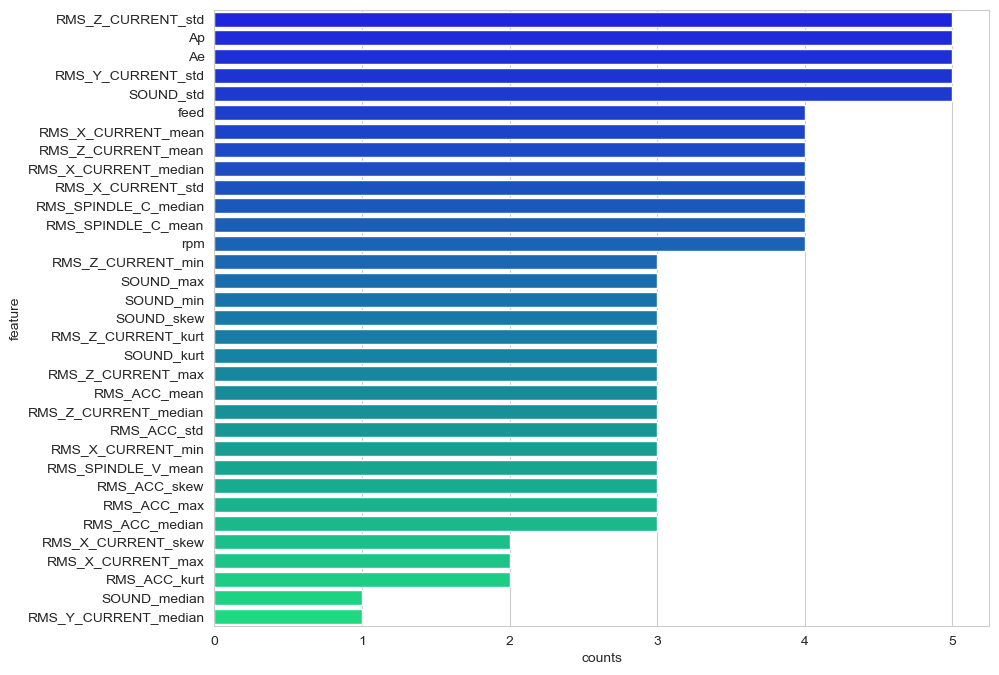

In [186]:
# 중요도 횟수 그래프
idx = count[count['counts'] == 0].index
count=count.drop(idx)
count = count.sort_values('counts',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax1=sns.barplot(x='counts',y='feature',data=count,orient='h',palette='winter')
#ax1.bar_label(ax1.containers[0])
plt.show()


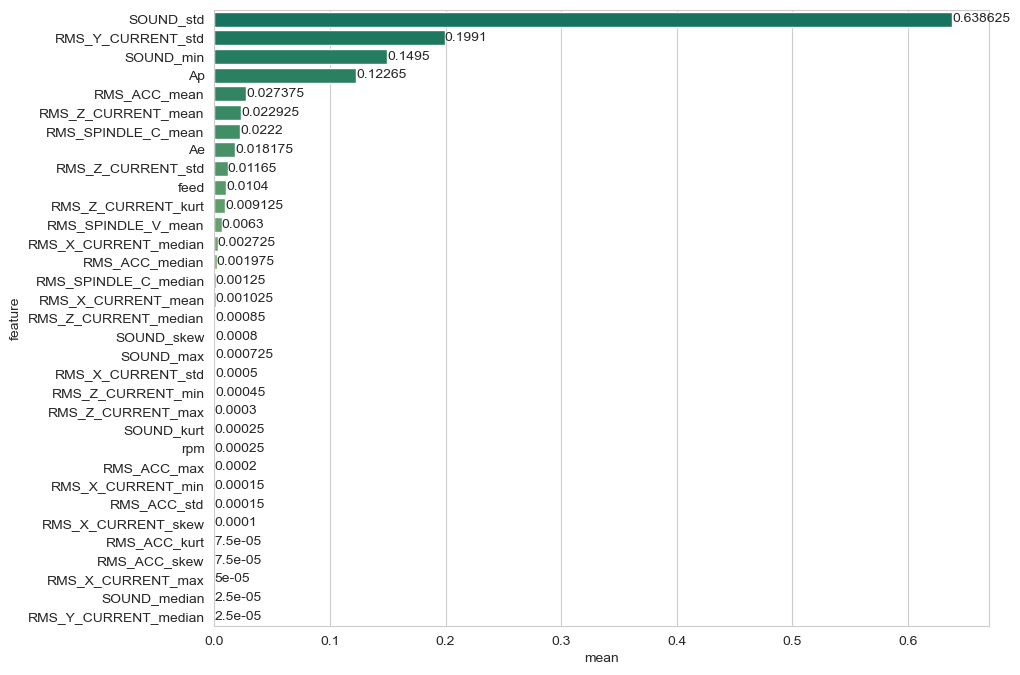

In [187]:
# 중요도 평균 그래프
idx = mean[mean['mean'] == 0].index
mean=mean.drop(idx)
mean = mean.sort_values('mean',ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax2=sns.barplot(x='mean',y='feature',data=mean,orient='h',palette='summer')
ax2.bar_label(ax2.containers[0])
plt.show()

In [188]:
# 3. 엑셀 파일 저장하기
#writer.save()